<a href="https://colab.research.google.com/github/ansonsibi1/Play-Store-App-Review-Analysis-/blob/main/Anson_Sibi_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## IMPORT LIBRARIES AND DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df1=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:

df2=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df1.info() , df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

(None, None)

In [ ]:
df1['Rating'].describe() 

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [ ]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Cleaning Data

##Removing null values


*  Rating,
current version,
Android version,
Content rating ,
type,


In [ ]:
missing_data_values=df1.isnull().sum()
missing_data_values[missing_data_values != 0].sort_values(ascending=False)


Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
dtype: int64

In [ ]:
#defining a function that would help in info regarding dtype, Null values ,Unique values
def get_info():
  df=pd.DataFrame(index=df1.columns)
  df['dtype']=df1.dtypes
  df['NUll Values']=df1.isnull().sum()
  df['Unique Values']=df1.nunique()
  return df


In [ ]:
get_info()

,dtype,NUll Values,Unique Values
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [ ]:
#removing null values
df1.Type.fillna(method='ffill',inplace=True)
df1['Content Rating'].fillna(method='ffill',inplace=True)
df1.Rating.fillna(df1.Rating.mean(),inplace=True)

In [ ]:
df1[df1.Rating>5]
df1.drop([10472],inplace=True)

In [ ]:
# The columns Current ver , Android Ver ,  LastUpdated may not be useful ,so it can be dropped
df1.drop(['Current Ver','Android Ver','Last Updated'], axis=1,inplace=True)

In [ ]:
#Columns like Reviews,size,Installs and Price can have numeric datatype. So converting it from object to int
df1['Reviews'] = df1['Reviews'].astype('float64')


In [ ]:
df1["Size"]=df1["Size"].apply(lambda x : x.replace('M','e+6'))
df1["Size"]=df1["Size"].apply(lambda x : x.replace('k','e+3'))
df1["Size"]=df1["Size"].fillna('ffill')
df1["Size"]=df1["Size"].replace('Varies with device', '0')
df1['Size']=pd.to_numeric(df1['Size'])





In [ ]:
df1['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 7.00e+06, 2.30e+07, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07, 0.00e+00,
       9.40e+06, 1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06,
       7.90e+06, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

In [ ]:
df1['Installs']=df1.Installs.apply(lambda x:x.strip('+'))
df1['Installs']=df1.Installs.apply(lambda x:x.replace(',',''))







In [ ]:
df1['Installs']=df1['Installs'].astype(float)
df1['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

In [ ]:
#price
df1['Price'] = df1.Price.str.replace('$','').astype('float64')

In [ ]:
get_info()

,dtype,NUll Values,Unique Values
App,object,0,9659
Category,object,0,33
Rating,float64,0,40
Reviews,float64,0,6001
Size,float64,0,460
Installs,float64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
def get_info2():
  df=pd.DataFrame(index=df2.columns)
  df['dtype']=df2.dtypes
  df['NUll Values']=df2.isnull().sum()
  df['Not NUll Values']=df2.notnull().sum()
  df['Unique Values']=df2.nunique()
  return df


In [ ]:
get_info2()

,dtype,NUll Values,Not NUll Values,Unique Values
App,object,0,64295,1074
Translated_Review,object,26868,37427,27994
Sentiment,object,26863,37432,3
Sentiment_Polarity,float64,26863,37432,6195
Sentiment_Subjectivity,float64,26863,37432,4530


As there are lot of null values.Its better to drop the rows having null values

In [ ]:
df2.dropna(axis=0 ,how='any',inplace=True)
df2.drop(['Translated_Review'] ,axis=1 ,inplace=True)


#Data Visualisation


In [ ]:
label = df1['Category'].value_counts(sort = True).index
size =df1['Category'].value_counts(sort = True)
labels = []
sizes = []
for i in range(len(label)):
    labels.append(label[i])
    sizes.append(size[i])
  

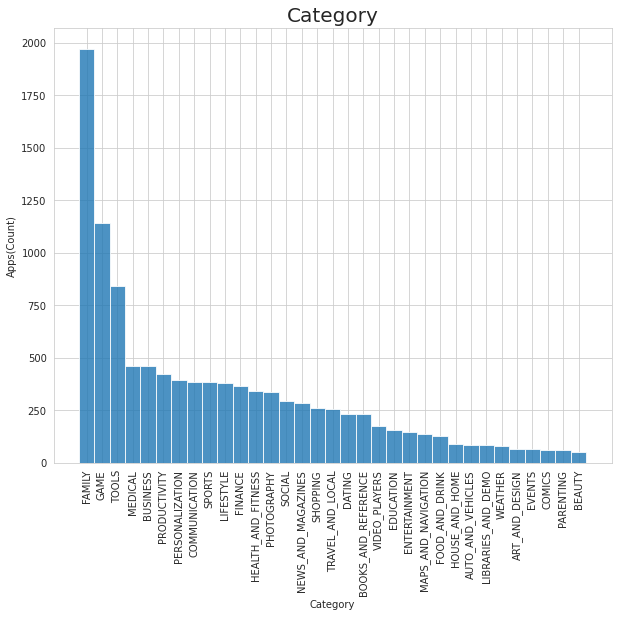

In [ ]:
plt.figure(figsize=(10,8));
plt.bar(labels,sizes,width=1, alpha=0.8);
plt.xticks(rotation=90)
plt.title('Category',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Category');
plt.show();


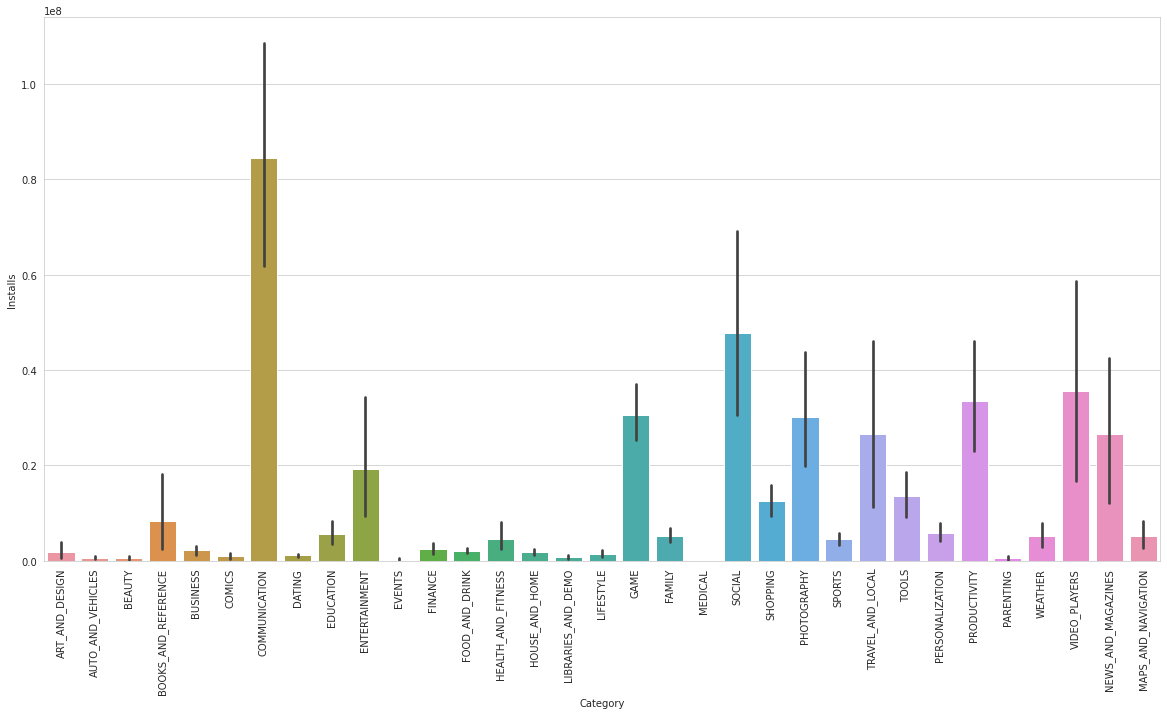

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Category', y='Installs', data=df1 ,ax=ax);
plt.xticks(rotation=90);


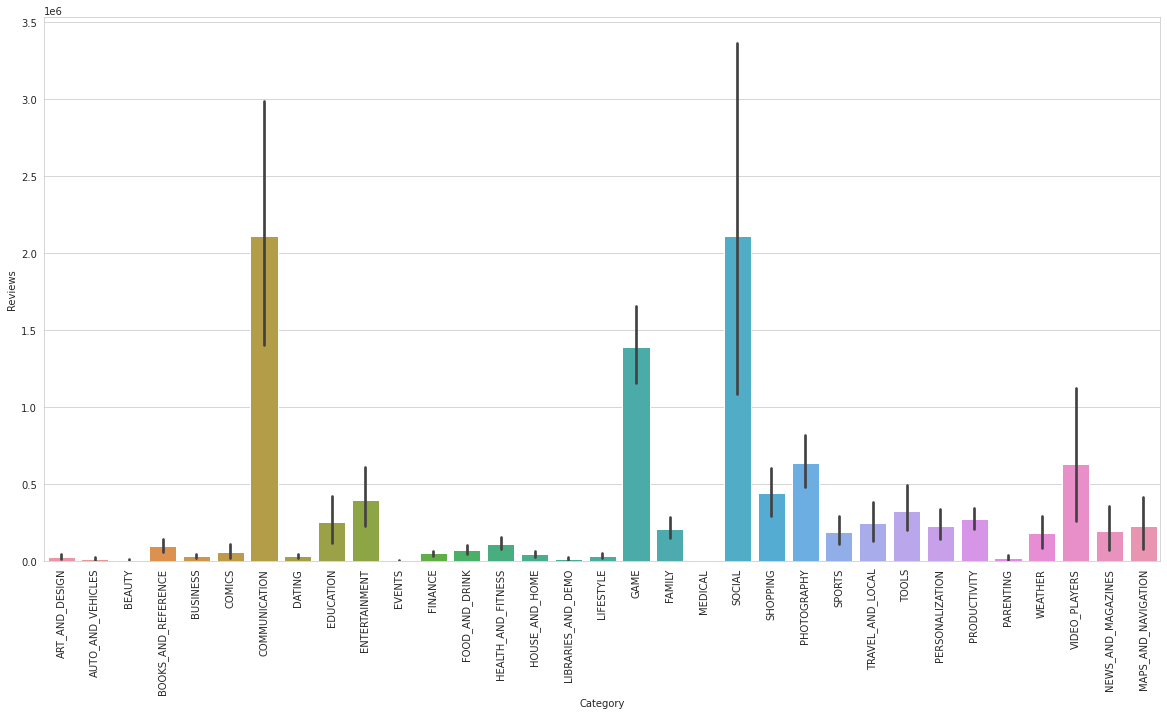

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Category', y='Reviews',data=df1 ,ax=ax);
plt.xticks(rotation=90);


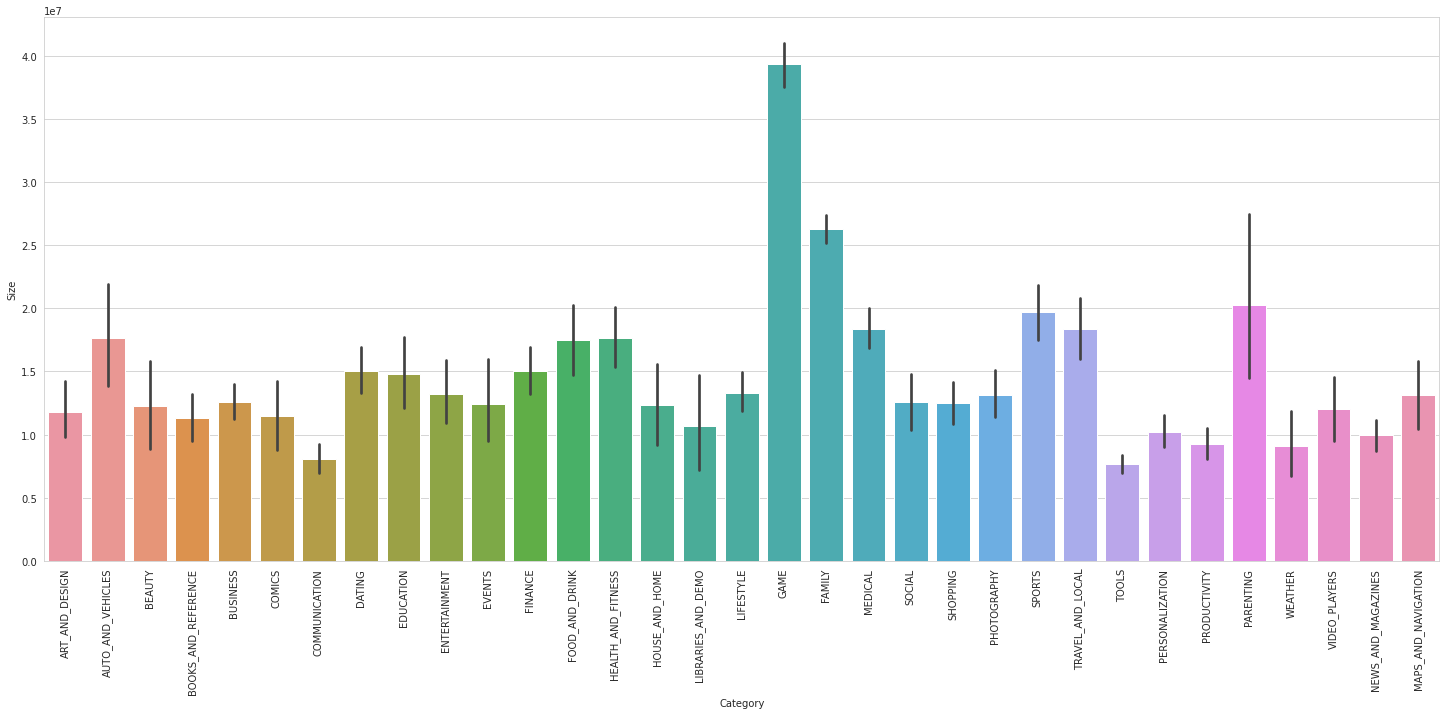

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x='Category', y='Size',data=df1 ,ax=ax);
plt.xticks(rotation=90);


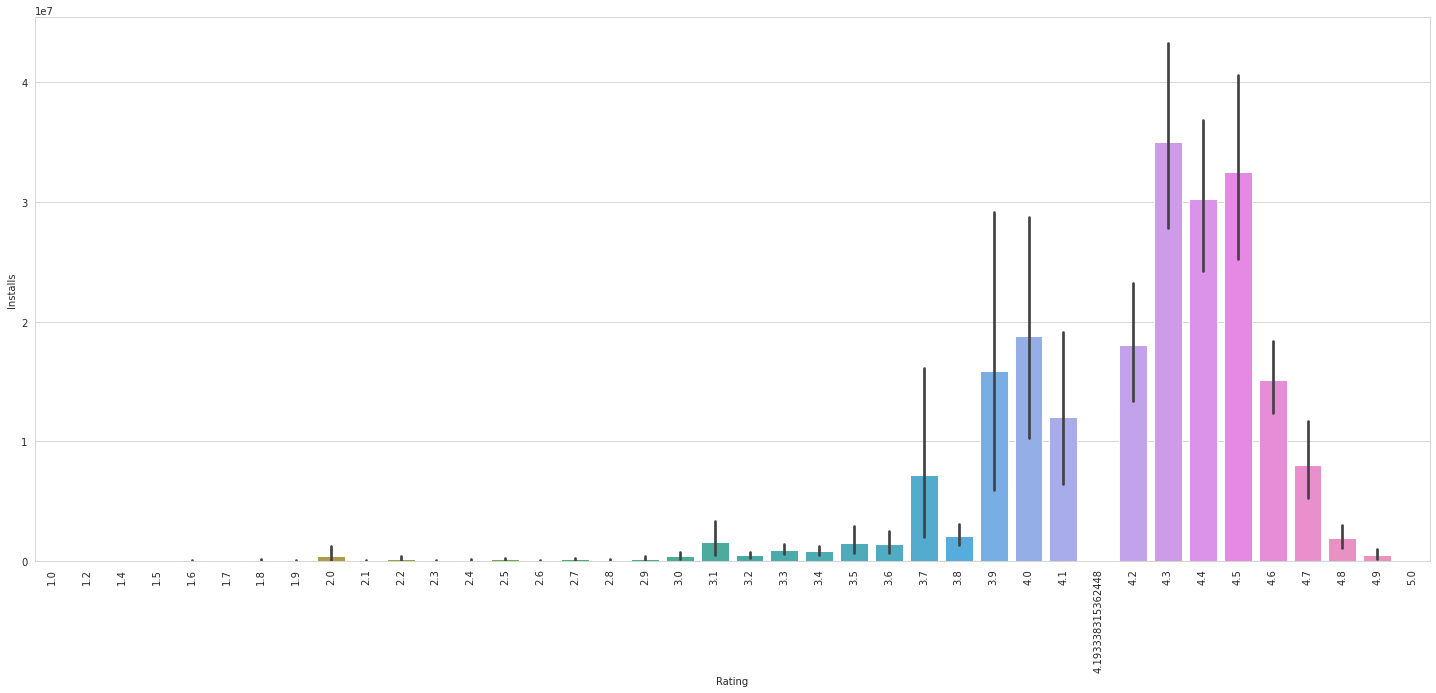

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x='Rating', y='Installs',data=df1 ,ax=ax);
plt.xticks(rotation=90);


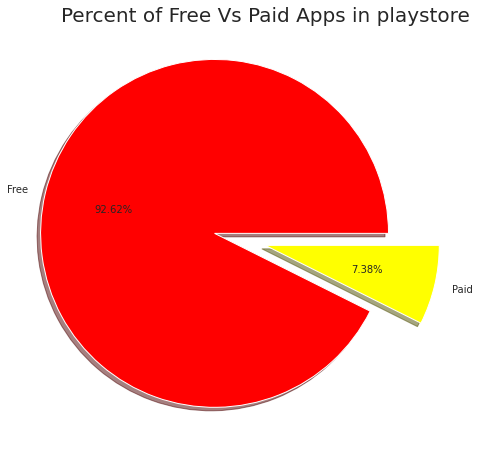

In [ ]:
plt.figure(figsize=(8,8))
labels = df1.Type.value_counts(sort = True).index
sizes =df1.Type.value_counts(sort = True)
colors = ["red","yellow"]
explode = (0.3,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%0.2f%%', shadow=True)
plt.title('Percent of Free Vs Paid Apps in playstore',size = 20)
plt.show()


In [ ]:
label = df1['Content Rating'].value_counts(sort = True).index
size =df1['Content Rating'].value_counts(sort = True)
labels = []
sizes = []
for i in range(len(label)):
    labels.append(label[i])
    sizes.append(size[i])

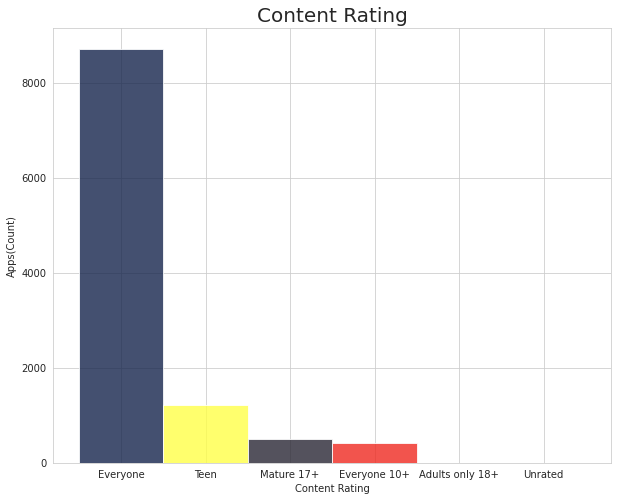

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(labels,sizes,width=1,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');
plt.show();


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


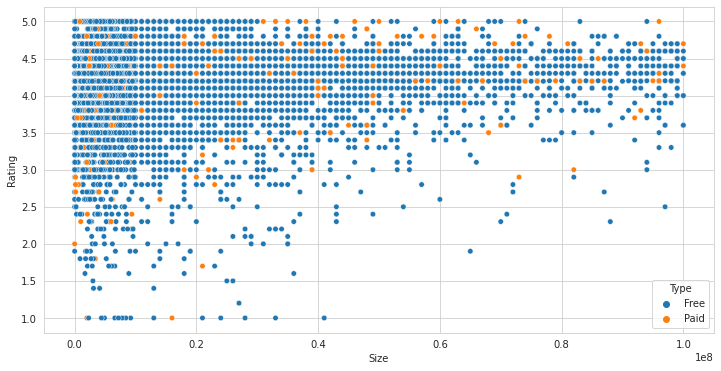

In [ ]:
plt.figure(figsize=(12, 6));
sns.scatterplot(df1['Size'],df1['Rating'],hue=df1['Type'],s=30);

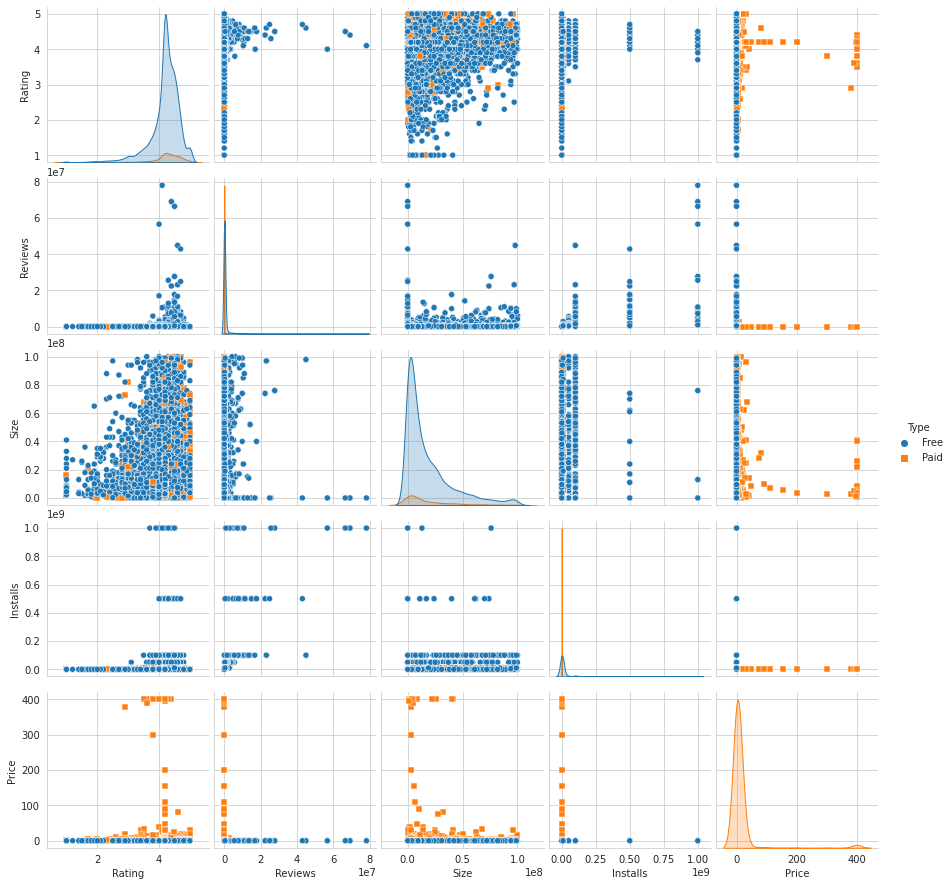

In [ ]:
sns.pairplot(df1, hue ='Type',markers=['o','s']) 
plt.show()

In [ ]:
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067950,0.044080,0.051139,-0.020178
Reviews,0.067950,1.000000,0.065458,0.643122,-0.009667
Size,0.044080,0.065458,1.000000,-0.003457,-0.013457
Installs,0.051139,0.643122,-0.003457,1.000000,-0.011689
Price,-0.020178,-0.009667,-0.013457,-0.011689,1.000000


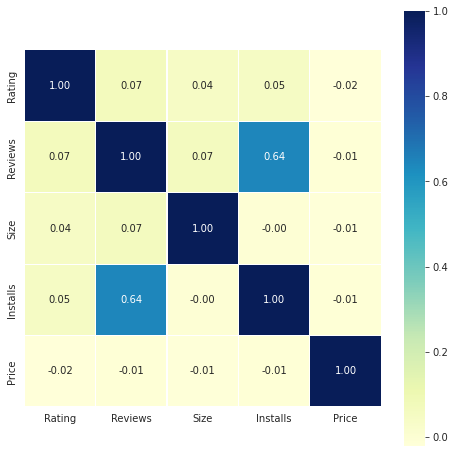

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df1.corr(),cmap="YlGnBu", ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

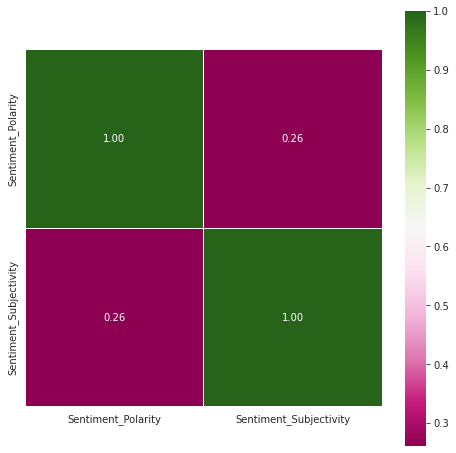

In [ ]:
df2.corr()
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df2.corr(),cmap="PiYG", ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()